In [60]:
import pandas as pd
import os
__file__ = os.getcwd()
dirname = os.path.dirname(__file__)
input_file = os.path.join(dirname, 'data\\dogodki50_spucano_glavnekategorije1.csv')
df = pd.read_csv(input_file, header = 0)
df.head()

,naziv,opis,datum_od,stevilo,sifra_prizorisca,kategorije_sifre,kategorije_nazivi,veselica,nazivpp,opispp,kategorije_sifre_new,kategorije_nazivi_new,is_veselica_prediction,is_veselica_prediction_score,veselicaNew
0,Umor na urologiji,Zlobni predstojnik urološke katedre in univerz...,2019-11-25 20:00:00,219,7.178823e+14,17,Theater,0,umor urologija,zloben predstojnik urološki katedra univerzite...,36,Film,1,44.970977,0
1,Umor na urologiji,"Umor na urologiji\ntorek, 26. november ob 20:0...",2019-11-26 20:00:00,449,7.178823e+14,17,Theater,0,umor urologija,umor urologija torek november zloben predstojn...,36,Film,1,44.970977,0
2,"Poletna šola / Summer school: Marko Peljhan, p...","Marko Peljhan, Here we go again...resolucije, ...",2019-08-29 18:00:00,66,3.192987e+11,25,Art,0,poleten šola summer school marka peljhan preda...,marka peljhan her again resolucija sprejemanje...,25,Art,1,44.970977,0
3,Gasilska veselica PGD Ig z ansamblom Ponos,"PGD Ig vabi na veliko gasilsko veselico, ki bo...",2019-09-07 20:00:00,482,4.190829e+14,15,Party,1,gasilski veselica pgd ansambel ponos,pgd vabiti veliko gasilski veselica ura dalje ...,999,Veselica,1,44.946647,1
4,IV. Obletnica VAŠKA KRČMA,Leto je na okoli in lokal VAŠKA KRČMA praznuje...,2020-01-25 14:00:00,184,9.983282e+14,38,Dance,0,iva obletnica vaški krčma,leto lokal vaški krčma praznovati dan prirejat...,999,Veselica,1,44.946289,1


In [61]:
df = df[pd.notnull(df['opispp'])]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8010 entries, 0 to 8009
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   naziv                         8010 non-null   object 
 1   opis                          8010 non-null   object 
 2   datum_od                      8010 non-null   object 
 3   stevilo                       8010 non-null   int64  
 4   sifra_prizorisca              7999 non-null   float64
 5   kategorije_sifre              8010 non-null   object 
 6   kategorije_nazivi             8010 non-null   object 
 7   veselica                      8010 non-null   int64  
 8   nazivpp                       7995 non-null   object 
 9   opispp                        8010 non-null   object 
 10  kategorije_sifre_new          8010 non-null   int64  
 11  kategorije_nazivi_new         8010 non-null   object 
 12  is_veselica_prediction        8010 non-null   int64  
 13  is_

In [63]:
col = ['kategorije_nazivi_new', 'opispp']
df = df[col]

In [64]:
df.columns

Index(['kategorije_nazivi_new', 'opispp'], dtype='object')

In [65]:
df.columns = ['kategorije_nazivi_new', 'opispp']

In [66]:
df['category_id'] = df['kategorije_nazivi_new'].factorize()[0]
from io import StringIO
category_id_df = df[['kategorije_nazivi_new', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'kategorije_nazivi_new']].values)

In [67]:
df.head()

,kategorije_nazivi_new,opispp,category_id
0,Film,zloben predstojnik urološki katedra univerzite...,0
1,Film,umor urologija torek november zloben predstojn...,0
2,Art,marka peljhan her again resolucija sprejemanje...,1
3,Veselica,pgd vabiti veliko gasilski veselica ura dalje ...,2
4,Veselica,leto lokal vaški krčma praznovati dan prirejat...,2


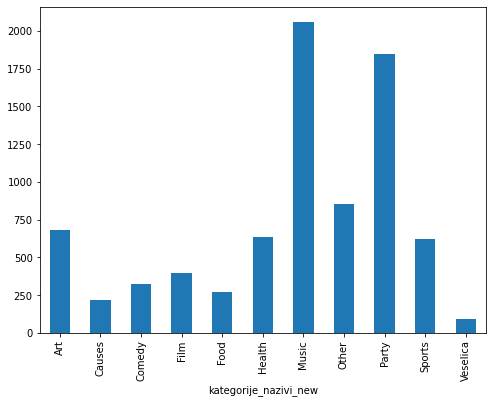

In [68]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('kategorije_nazivi_new').opispp.count().plot.bar(ylim=0)
plt.show()

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, max_df=0.95, min_df=3, ngram_range=(1, 2), norm='l2')

features = tfidf.fit_transform(df.opispp).toarray()
labels = df.category_id
features.shape

(8010, 63434)

In [70]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for kategorije_nazivi_new, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(kategorije_nazivi_new))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Art':
  . Most correlated unigrams:
       . galerija
       . razstava
  . Most correlated bigrams:
       . likoven umetnost
       . odprtje razstava
# 'Causes':
  . Most correlated unigrams:
       . štrajk
       . ptica
  . Most correlated bigrams:
       . atopijski dermatitis
       . domena savič
# 'Comedy':
  . Most correlated unigrams:
       . komik
       . komedija
  . Most correlated bigrams:
       . kriza srednji
       . srednji leto
# 'Film':
  . Most correlated unigrams:
       . filmski
       . film
  . Most correlated bigrams:
       . piknik kino
       . kolosej ljubljana
# 'Food':
  . Most correlated unigrams:
       . dburger
       . burger
  . Most correlated bigrams:
       . burger krompirček
       . dburger foodtruck
# 'Health':
  . Most correlated unigrams:
       . telo
       . pešec
  . Most correlated bigrams:
       . znanje življenje
       . andrej pešec
# 'Music':
  . Most correlated unigrams:
       . album
       . koncert
  . Most correla

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['opispp'], df['kategorije_nazivi_new'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)



In [72]:
predictString = "čas lifa prihajati zvezda vedeti vedeti lifa vroč vedeti super žurer hoditi dom lifa prihajati fantastičen ogrevanje poskrbeti sandy deej vstopnina predprodaja eventimpoštapetrola predprodaja vrata dan dogodek starosten omejitev aga limiti infa vip rezervacija lifediskoteka gmailc lifeklubdomzati"

print(clf.predict(count_vect.transform([predictString])))

df[df['opispp'] == predictString]

['Party']


,kategorije_nazivi_new,opispp,category_id


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\Waz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Waz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

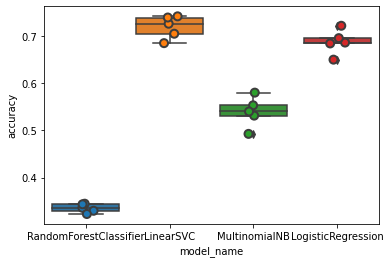

In [74]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [75]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.719226
LogisticRegression        0.687391
MultinomialNB             0.539326
RandomForestClassifier    0.335206
Name: accuracy, dtype: float64

In [76]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

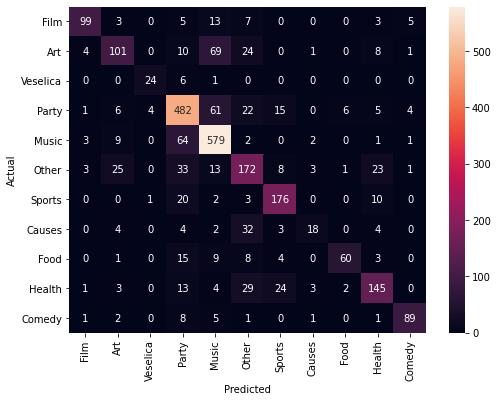

In [77]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.kategorije_nazivi_new.values, yticklabels=category_id_df.kategorije_nazivi_new.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [78]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['kategorije_nazivi_new', 'opispp']])
      print('')

'Party' predicted as 'Art' : 6 examples.


,kategorije_nazivi_new,opispp
6870,Party,podobaimagen flamenko plesen predstava plesale...
7854,Party,september dijakinja dijak svšgugl gimnazija kr...
7216,Party,spanje oblika krajina pošast plesnogledališki ...
2060,Party,flipsida rock banda ljubljana okolica nastati ...
4774,Party,rok kušlan pripovedovanje doleteti špiker radi...
4400,Party,kraj dogodek kulturen dom črnuče dunajski cest...



'Music' predicted as 'Art' : 9 examples.


,kategorije_nazivi_new,opispp
3991,Music,vrhunski glasbenik ljudski godec stoletje oble...
7486,Music,premiera francija belgija mednaroden projekt c...
6100,Music,počasi daleč priti počasi splesti vez dokler s...
2921,Music,zaslišati trajati vstopnica društvo arsan jadr...
7338,Music,andraž kajzer umetniški direktor showcas festi...
7230,Music,sklop festival jeff odviti kreativen delavnica...
4587,Music,dovč gombač mesten gledaliti ptovati izkušen g...
4920,Music,branden garrett pravi ime borut grošičar slove...
5790,Music,ada smolar glasben kariera prejeti številen na...



'Other' predicted as 'Art' : 25 examples.


,kategorije_nazivi_new,opispp
6583,Other,ukrep zajezitev širjenje slovenija mada maj ra...
1531,Other,vljudno vabljen literaren dogodek pogovor avto...
7953,Other,razstava velenje prikazovati urbanističen zasn...
1900,Other,iti gor zajec iti pijan pijan čep zgodba zajec...
7771,Other,gregor čušin igralec trenutno gledati razvpiti...
5423,Other,odpirati sezona dogodek aluouh študijski leto ...
4031,Other,sodoben evropski družba dobivati nov podoba ko...
1726,Other,spoštovan vljudno vabiti odprtje razstava leto...
3743,Other,redek brati poezija žuliti pesem pogovoriti po...
4721,Other,predavati nina smola hoja francoskošpanski pot...



'Art' predicted as 'Party' : 10 examples.


,kategorije_nazivi_new,opispp
5371,Art,dolg čas organizirati boudoir druženje dogodek...
2260,Art,turističen društvo ribnica pohorje občina ribn...
2171,Art,urban plesen stil povezovanje različen gibalen...
6904,Art,slavnosten prižig prazničen luč otvoritev nov ...
195,Art,ostrigin kulturen večer sobota ostriga koncert...
6486,Art,vesel december hiteti zabava zabava bleščeče o...
3828,Art,kamniški svetloben inštalacija leto najti nov ...
6966,Art,uvod vesel december preša začenjati program od...
7025,Art,rap domačica obala prihajati masaya vazza lux ...
2657,Art,vabljen mesto star trta world oldest vina kjer...



'Veselica' predicted as 'Party' : 6 examples.


,kategorije_nazivi_new,opispp
44,Veselica,pripraviti najbolj noro poleten noč rogaški sl...
49,Veselica,joker attack petek klub pivnica nov generacija...
147,Veselica,aninski noč pgd stojnci prirejati tradicionaln...
84,Veselica,sobota pustovanje ansambel nemir pustovanje an...
187,Veselica,društvo podeželski mladina vrsnikledina letos ...
4,Veselica,leto lokal vaški krčma praznovati dan prirejat...



'Music' predicted as 'Party' : 64 examples.


,kategorije_nazivi_new,opispp
1433,Music,basolovka konec november udariti dancehall edi...
4783,Music,vroč poletje nor zabava poletje doma terme top...
4592,Music,tradicionalen poljanski dogodek vračati več in...
7088,Music,opna air pool party petek ponovno pripravljati...
2972,Music,first rnba reunion new decada rnba reunion nov...
...,...,...
3683,Music,mission delirium zasedba san francisco zadnji ...
2019,Music,predbožičen druženje zimzelen slovenski glasba...
476,Music,festival leto nov lokacija nepozabno doživetje...
3192,Music,pustovanje medvode družina nik zorjan čuk otro...



'Other' predicted as 'Party' : 33 examples.


,kategorije_nazivi_new,opispp
167,Other,riben praviti pravljica prepričan grimm anders...
5810,Other,solza žmavec dražba stvar bivši dan gregorjev ...
684,Other,spoštovan igralec igralka ljubitelj virtualen ...
944,Other,ponedeljek vabiti opazovanje meteorski roj per...
574,Other,kraj imeti plac kjer manjkati sobota plac bota...
6309,Other,pust obetati poseben obisk samorog soboten pop...
5453,Other,pivo craft pivovarna friz beer točiti praznik ...
1082,Other,brezplačen dogodek število udeleženec omejen p...
1284,Other,alfa klub slovenija fiat klub slovenija skupaj...
3294,Other,dogodek jesenski čist vabiti najbolj noro leto...



'Sports' predicted as 'Party' : 20 examples.


,kategorije_nazivi_new,opispp
7502,Sports,slovenski športnik podpirati optika clarus zat...
6671,Sports,brezplačno razgibati nedelja mali dvorana ples...
6929,Sports,kgd reciklaža stoletnica mariborski šahovski k...
1892,Sports,zlat znak občina krški pokal franec babič spor...
683,Sports,ponovno vračati tokrat izvedba dobrodelen moto...
660,Sports,sla okrilje športen kulturen društvo pompon so...
3705,Sports,letošnji tradicionalen veslaški praznik padsti...
5600,Sports,dan prirejati gasilski bojleskovec vabilo prij...
667,Sports,kinološki društvo maribor sodelovanje društvo ...
2262,Sports,joga srečen bok petek studio parmov ljubljana ...



'Food' predicted as 'Party' : 15 examples.


,kategorije_nazivi_new,opispp
5740,Food,drag zbran jadralec klapa snif vabiti jubilejn...
3243,Food,sreda oktober verac praznovati obletnica dan i...
3476,Food,kunstljev tradicionalen silvestrski večerja po...
5220,Food,spleten mesto vino okrepčevalnica čomp priprav...
2909,Food,nov foodtruck nov foodtruck zverina petek prvi...
6565,Food,klobasica klobasa nja tradicionalno srečanje i...
6964,Food,koroški kuhíen tokrat malo drugače lokacija ve...
7123,Food,vabiti invitiati costat party petek venerdi mo...
6478,Food,zelo uspešen delavnica glede veliko povpraševa...
4671,Food,dan odprt vrata pršutarna kras šepulja nedelja...



'Health' predicted as 'Party' : 13 examples.


,kategorije_nazivi_new,opispp
3353,Health,prazničen vzdušje predbožičen čas podati lep e...
6545,Health,decembrski sobota odpreti vrata planinski hram...
2883,Health,sobota vabiti tradicionalno martinovo sobota v...
5728,Health,izbira prehrana obisk znanec običajen večeren ...
7728,Health,uganda tanzanija zanzibar postreči praktično v...
1129,Health,dobiti bitka reči vojna vseeno razlog praznova...
1063,Health,ponedeljek lep noč leto noč lahko izpolniti že...
6707,Health,cesta stegnjen roka palec kam iti kamor iti šo...
4428,Health,miklavž pohod bakla trojica vabiti športen par...
7723,Health,trgovina predvajati božičen glasba zaplesati i...



'Comedy' predicted as 'Party' : 8 examples.


,kategorije_nazivi_new,opispp
2888,Comedy,društvo godlar šenčur letos organizirati jubil...
6859,Comedy,tradicionalen stand večer markovci smejati ned...
4615,Comedy,menopavza špas teater komedija režija kleflin ...
1386,Comedy,joška noč čarovnica ponovno vračati kjer pripr...
4663,Comedy,pustovanje vabljen dober zabava mesto welcom d...
6861,Comedy,pustovanje idrija sobota pusten rajanje otrok ...
939,Comedy,krajeven skupnost vogrski kulturen turističen ...
4213,Comedy,bung stand večer stalnica center mlad koper me...



'Film' predicted as 'Music' : 13 examples.


,kategorije_nazivi_new,opispp
1060,Film,mali velik srednji priden poreden razodevati s...
1651,Film,yumba ples afriški vilinec delavnica afriški p...
5001,Film,ditka fera lainšček valentinov koncert ljubeze...
1564,Film,preplet tradicija modernost tradicionalen balk...
7890,Film,pokukati mednaroden medvedji pisarna spoznati ...
6635,Film,zamuditi pravljičen muzikal imeti sedaj nov pr...
5794,Film,članica skupina igralka gledališče dakh kijev ...
4394,Film,album nomad nastajati polovica leto nastanek s...
4418,Film,ditka fera lainšček glasben literaren dogodek ...
4279,Film,čas antičen legenda ritualen ples povezovati č...



'Art' predicted as 'Music' : 69 examples.


,kategorije_nazivi_new,opispp
5409,Art,lea sirka postojna posvoj zmaga festival uvrst...
1029,Art,dober človek par leto izid plata cel avion bru...
1642,Art,glasba daniel studer markus poslušalec izzvati...
1829,Art,svečan akademija akademija glasba ula visok gl...
6300,Art,zasnovati grafičen podoba podjetje izstopati r...
...,...,...
3672,Art,ditka svet glasba vstopiti majhen deklica oče ...
5859,Art,novoleten koncert oda radost oda joy orkester ...
5980,Art,prazničen čas odličen glasbenik božati glasba ...
3788,Art,petek slamič petiti biga banda ricardo luqu fe...



'Party' predicted as 'Music' : 61 examples.


,kategorije_nazivi_new,opispp
1785,Party,rifugia bar rifugia bar etiènn tempera skupina...
6292,Party,banda ambrosia franšiza spinoff hčerinski firm...
134,Party,emkej muzičariti diskoteka anton sobota novemb...
2755,Party,villa mondin noč poletje počasi končevati vedn...
1573,Party,letos čakati zabava skupaj nastopiti mira todo...
...,...,...
1524,Party,ponovno prebujati ormož rezervirati glasno nas...
520,Party,velik veselje navdušenec swing rhythm blues ro...
5178,Party,rgba series coga meets schrauff praznično nor ...
4886,Party,zaplesati ritem popularen glasba zimzelen doma...



'Other' predicted as 'Music' : 13 examples.


,kategorije_nazivi_new,opispp
6378,Other,trainstation imeti prazen stena red treba zapo...
2190,Other,zadnji metal noč leto tribut metallica iti edi...
7155,Other,dvestoletnica whitmanov rojstvo šerpa iziti no...
4247,Other,lik canaries coala miniti sonic mgmsum predsta...
1751,Other,žgoč pogled zacoprati hudičevka čas stoletje v...
3667,Other,slovenija miting mali letalstvo lesce velik mi...
5824,Other,koncert izid nov album mednaroden dan glasba p...
4291,Other,toplo oblečen otroški radoveden vilinka viline...
2359,Other,knjižnica lahko premierno prisluhniti radijski...
7015,Other,tržaški cesta stati šola stopnišče utirati pot...



'Food' predicted as 'Music' : 9 examples.


,kategorije_nazivi_new,opispp
7729,Food,druženje imetnik bohinjskofer bohinj vrhunski ...
1746,Food,pripravljen vinskokulinaričen spektakel zdravi...
1332,Food,vljudno vabljen kulinaričen doživetje občinski...
2420,Food,grajski dvorišče zadišati ura lahko sprehoditi...
6756,Food,druženje imetnik bohinjskofer bohinj vrhunski ...
4534,Food,praznik bakala pričetek akcija dan bakala zdru...
608,Food,tradicija jurjevanje čas svet jurij zavetnik m...
7343,Food,edinstven priložnost preizkušanje dobrota spre...
7385,Food,praviti sproščen druženje trg petkanje predsta...



'Film' predicted as 'Other' : 7 examples.


,kategorije_nazivi_new,opispp
6556,Film,predavanje aleš česen letošnji dobitnik zlat c...
4975,Film,édouard louis zgodovina nasilje režija ivica b...
7475,Film,andrej rozman roza baati motiv baati bertolt b...
4861,Film,povabljen čuten svet duša mir zrcalo zlat mir ...
3566,Film,tedxyouth gimnazija kranje leto vračati scena ...
3117,Film,soboten popoldne oktober ponovno rezerviran ml...
3225,Film,zima poln pravljica prisluhniti snežno vila iz...



'Art' predicted as 'Other' : 24 examples.


,kategorije_nazivi_new,opispp
4121,Art,vabljen predstavitev pesniški prvenec aljaž ko...
558,Art,bližati oktober osrednji moden dogodek letošnj...
2228,Art,ljubljana prihajati najbolj iskan švicarski pe...
29,Art,slovenski kinoteka ljubljana unescov mesto lit...
6327,Art,slovenski teden programiranje codeweeks začeti...
6126,Art,pef okvir mednaroden dan materen jezik obeleže...
2696,Art,neverjetno piran imeti piramida daven čas člov...
3935,Art,slovenski knjižen sejem sektor fotocon preddve...
5024,Art,delavnica izdelava pohištvo paleta predavanje ...
5392,Art,strip željen bralec december znova priti račun...



'Party' predicted as 'Other' : 22 examples.


,kategorije_nazivi_new,opispp
1022,Party,dogodek predstaviti ponudnik obrtniški rokodel...
257,Party,vau čas leto imeti fajn imeti leto zato veselj...
4214,Party,petek predavanje kalo kočevski kostel osilnica...
5295,Party,vabilo predstavitev vabiti pridružiti predstav...
5952,Party,teden otrok planet tuš kranje sobota pripravit...
5804,Party,pravljica prižig lučka zasedba avtomobil meste...
4152,Party,rimski spektakel tabor rimski kampo poetovio p...
7635,Party,turističen društvo rudolf maister vojan zavrh ...
7726,Party,marka kržan razreden boj četrtek november pred...
5095,Party,otroški festival četrtek vabljen prešernov trg...



'Causes' predicted as 'Other' : 32 examples.


,kategorije_nazivi_new,opispp
713,Causes,ekskluzivno dolenjski lastnik podjetje samosto...
6734,Causes,delavnica kultura gospodarstvo društvo asociac...
7786,Causes,leten čas bogat zanimiv izkustven program name...
3014,Causes,koroški občina dolg leto področje novogradnja ...
2824,Causes,zasvojenost čas selfi svet dan objaviti milijo...
3287,Causes,sloveniti prihajati težko pričakovan svetoven ...
1216,Causes,univerziteten mesto prostor študent izpit prip...
2111,Causes,okrogel miza rešitev delavnica ugleden strokov...
6012,Causes,javen video pogovor george monbiot avtor okolj...
3464,Causes,učenec učitelj šola preživljati veliko čas uči...



'Food' predicted as 'Other' : 8 examples.


,kategorije_nazivi_new,opispp
7203,Food,slika beseda sprehoditi pestro vrten okolje sp...
1615,Food,vabiti ekopraznik praznovanje ekotržnica ljubl...
4633,Food,vabiti dobrodelen veganski pojedina potekati n...
7939,Food,rdeč nit tečaj priprava različen vrsta morski ...
5901,Food,ljudstvo vabiti špecialen gurmanski otvoritev ...
6610,Food,grad bogenšperk odpirati vrata ljubitelj kulin...
7692,Food,program tečaj macarons macarons pasijonka maca...
1019,Food,sladek ister mednaroden festival sladica slade...



'Health' predicted as 'Other' : 29 examples.


,kategorije_nazivi_new,opispp
7546,Health,neuraden nepreverjen informacija dan sklican n...
3697,Health,tečaj namenjen tečaj namenjen popoln začetnik ...
3688,Health,preživeti dan zdravo sožitje narava udeležiti ...
2150,Health,leto games begina študentski svet praven fakul...
4543,Health,celodneven druženje priznan poznavalec pot dob...
4140,Health,reševanje konflikt osnova mediacija načelo nen...
865,Health,ime povedati veliko več dolgo potovanje vlak p...
2480,Health,event celebrati harvesti honey well promot hon...
4986,Health,družiti spoznavati izmenjevati znanje ogledova...
6370,Health,pozdravljen letos sklop urgenten delavnica med...



'Party' predicted as 'Sports' : 15 examples.


,kategorije_nazivi_new,opispp
4273,Party,tekma vzhod obujati dogodek poskrbeti mesto zb...
4551,Party,tekmovalen kategorija član članica dodaten toč...
1087,Party,vljudno vabljen turnir glasben prireditev leto...
152,Party,letos društvo tantadrovati ponovno organizirat...
5473,Party,english below prijeten pozdrav študent zaposle...
3629,Party,kovka rovt vabiti turnir beer pong kdaj kje dv...
3374,Party,koneeeeec julij zadnji wikend popetra plesati ...
2526,Party,približevati sedaj tradicionalen dogodek jesen...
4391,Party,letos marec ljubljana vračati beer maraton tek...
826,Party,sodelovanje vitez najemnik celjski grof pripra...



'Other' predicted as 'Sports' : 8 examples.


,kategorije_nazivi_new,opispp
7016,Other,planinski društvo dramlja organizirati pohod k...
3443,Other,društvo vrsta leto prirejati maraton teden tra...
5597,Other,kdaj petek kje obrten cona breg tehničen pregl...
4299,Other,konec september vabiti delavnica hitrosten koc...
6799,Other,prvič vrhnika fif turnir povabljen vrhnika pot...
1391,Other,boldertrisa scena spored najbolj romantičen da...
6595,Other,prireditev tradicionalno srečanje starodoben v...
1245,Other,velik kasaški prireditev leto tokrat ponovno z...



'Health' predicted as 'Sports' : 24 examples.


,kategorije_nazivi_new,opispp
5984,Health,spoznati pohorje kolo popeljati neokrnjen nara...
5140,Health,vedeti občutek prometen nesreča vozilo obrniti...
6669,Health,februar tradicionalno kulturen praznik teči še...
274,Health,pozdravljen leto približevati tradicionalen pr...
1142,Health,obvestilo tekmovalen ekipa prijava ekipa bar r...
4110,Health,tam kjer hoditi levstik preljub litija vinorod...
7308,Health,sejem alpa adria obvestiti sejemski površina n...
6806,Health,tečaj zimski gorništvo dvodneven zimski tečaj ...
4995,Health,dobiti nedelja julij kmetija tdolenje laz jeze...
2839,Health,tradicionalen turnir kings beach odvijati sklo...



'Party' predicted as 'Food' : 6 examples.


,kategorije_nazivi_new,opispp
7048,Party,gin večer popestritev nor burger sreda sreda d...
2946,Party,petek služba najti kuch nazdraviti ayatan ferm...
3807,Party,zdaj iti green lak piknik žar milina burger me...
5584,Party,dolenjski martinovanje kje grad grm nov mesto ...
1828,Party,mesten središče dežela celjski vabiti okus zgo...
1247,Party,vinski pot rov star kranje zaključiti sladko n...



'Art' predicted as 'Health' : 8 examples.


,kategorije_nazivi_new,opispp
7991,Art,osvoboditev ženska del vstopnina gotovina dela...
7330,Art,vedno prisegati pisanje roka zanimati lotevati...
6380,Art,prisrčno vabljen brezplačno predavanje vesen j...
5328,Art,prisrčno vabljen brezplačno predavanje avinash...
6526,Art,obuti maček zgodba mlinarjev sin matic očetov ...
6889,Art,rast zavest voditi globoko osrečujoč odnos vik...
4221,Art,obveščati soboten dogodek zajtrk shamballa pre...
7789,Art,princip ženska del vstopnina gotovina delavnic...



'Other' predicted as 'Health' : 23 examples.


,kategorije_nazivi_new,opispp
3616,Other,dogodek prestavljen datum nadaljnji informacij...
3284,Other,svetoven dan mokrišče plisk mladinski pliskovi...
6130,Other,šolski leto prenaporno lahko narediti korak na...
7149,Other,šiška pravljičen dežela nekoč tukaj stati grad...
5625,Other,večer družaben igra kmkca kompleks počasi post...
1143,Other,drag bodoč mamica zadnji dogodek okrogel trebu...
6891,Other,drag starš pogosto soočati čustven izbruh otro...
7718,Other,postati certificiran meditacijski terapevt pom...
1282,Other,prestavljen datum znan naknadno sproten delo p...
6191,Other,mihael žmahar avtor razprodan knjižen uspešnic...



'Sports' predicted as 'Health' : 10 examples.


,kategorije_nazivi_new,opispp
7537,Sports,preizkusiti skupinski vadba brezplačen promoci...
6577,Sports,izvedeti element potrebno vključiti postopek t...
4164,Sports,drag zavedati zmagati pomagati dogodek prestav...
6776,Sports,četrtek fakulteta veda zdravje potekati stroko...
5949,Sports,ponovno mesto zbrati različen strokovnjak deli...
3812,Sports,smučanje fakulteta šport kje cerkno kdaj cena ...
6591,Sports,privoščiti preventiven trening ledven hrbtenic...
2823,Sports,smučanje kje cerkno kdaj cena drag študent nab...
415,Sports,program koper gib taverna okolica ura naprej d...
6175,Sports,gibalen analiza razvoj celodneven seminar kdaj...


In [56]:
model.fit(features, labels)

LinearSVC()

In [57]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Art':
  . Top unigrams:
       . razstava
       . galerija
  . Top bigrams:
       . glasba univerza
       . stolp škrlovec
# 'Causes':
  . Top unigrams:
       . ptica
       . oblačilo
  . Top bigrams:
       . atopijski dermatitis
       . turističen vodnik
# 'Comedy':
  . Top unigrams:
       . komedija
       . stand
  . Top bigrams:
       . loški pub
       . gašper bergant
# 'Film':
  . Top unigrams:
       . film
       . filmski
  . Top bigrams:
       . vstopnica prodaja
       . zagotoviti vstopnica
# 'Food':
  . Top unigrams:
       . burger
       . chef
  . Top bigrams:
       . dburger foodtruck
       . street food
# 'Health':
  . Top unigrams:
       . zdravje
       . joga
  . Top bigrams:
       . planinski dom
       . prijava info
# 'Music':
  . Top unigrams:
       . koncert
       . glasben
  . Top bigrams:
       . musica policy
       . ples zabava
# 'Other':
  . Top unigrams:
       . sejem
       . nasvet
  . Top bigrams:
       . več spleten
       . b

In [58]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['kategorije_nazivi_new'].unique()))

              precision    recall  f1-score   support

         Art       0.66      0.41      0.51       249
      Causes       0.59      0.32      0.41        60
       Party       0.72      0.78      0.75       641
       Music       0.76      0.86      0.81       691
       Other       0.57      0.63      0.60       272
      Sports       0.77      0.83      0.80       200
      Comedy       0.85      0.79      0.82       110
        Food       0.77      0.53      0.63        75
        Film       0.81      0.79      0.80       126
      Health       0.78      0.63      0.70       220

    accuracy                           0.73      2644
   macro avg       0.73      0.66      0.68      2644
weighted avg       0.73      0.73      0.72      2644



In [93]:

   
sys.path.append(os.path.abspath("../extras"))
from textCleaningNLTK import preprocessText

texts = ["""100 KM ROLANJA V ENEM DNEVU. Sprejmeš izziv? 😃
100 km ali ultra 100 km – gre za tradicionalno in še vedno edinstveno rolanje po 100 km dolgi trasi v enem dnevu. 100 km rolanja ni le edinstvena športna izkušnja, ampak tudi preizkušnja samega sebe, kjer nisi časovno omejen, soočiti pa se moraš s svojim pogumom ter fizičnimi in psihičnimi sposobnostmi.
Dogodek je tudi letos namenjen samo članom športnega društva ROLANJE.EU. Držali se bomo vseh aktualnih predpisov za covid-19, četudi to pomeni, da rolamo z 1 km medsebojne razdalje. 😃 Morda pa v najbolj skrajnem primeru celo prek spleta vsak v svoji občini. 😃
🔥 KDAJ: sobota, 18. 9. 2021 ob 8.30
🔥 KJE SE ZBEREMO IN ŠTARTAMO: 8. 30, kolesarsko počivališče Sonček v Mojstrani
🔥 PREDVIDEN ČAS ROLANJA: 100 km oziroma ca. 8 ur
🔥 TRASA: Trasa poteka po dobro poznani in eni izmed najlepših in najbolj varnih rolerskih poti pri nas. Za ogrevanje bomo prvih 10 km rolali v rahel klanec proti Kranjski Gori, nadaljevali mimo Rateč do slovensko-italijanske meje, nato pa nas bo pot vodila v Italijo skozi Trbiž do mesta, kjer bo ura pokazala 50 km. Po kratki pavzi sledi povratek po isti poti do izhodišča. Zadnjih 20 km predstavlja prijeten spust, ki ga zagotovo že vsi komaj čakamo!
🔥 OPREMA: Med rolanjem je OBVEZNA uporaba čelade, ostali ščitniki pa so zelo priporočljivi, še posebej za zapestje. Vsak roleraš naj ima s seboj 1 l tekočine in športno oziroma dovolj kalorično hrano, da ne bo zmanjkalo energije.
Tisti, ki prerolajo 100 km v celoti, dobijo tudi unikatno izdelano medaljo v čast in večni spomin.
Po dogodku je predvideno tudi prijetno druženje nekje ob vodi z možnostjo piknika, zato priporočamo topla oblačila in obutev, piknik dekce, podloge za ležanje, napihljive blazine, kopalke itd"""]
textsCleaned = []
for text in texts:
    preprocessText = preprocessText(text)
    print(preprocessText)
    textsCleaned.append(preprocessText)
    
text_features = tfidf.transform(textsCleaned)
predictions = model.predict(text_features)
for text, predicted in zip(textsCleaned, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")



rolanje dan sprejeti izziv ultra iti tradicionalno vedno edinstven rolanje dolg trasa dan rolanje edinstven športen izkušnja preizkušnja sam kjer časovno omejen soočiti pogum fizičen psihičen sposobnost dogodek letos namenjen član športen društvo rolanjee držati aktualen predpis pomeniti rolati medsebojen razdalja najbolj skrajen primer splet občina kdaj sobota kje zbrati štartati kolesarski počivališče sonček mojstrana predviden čas rolanje ura trasa trasa potekati dobro poznan lep najbolj varen rolerski pot ogrevanje rolati rahel klanec kranjski gora nadaljevati rateči slovenskoitalijanski meja nato pot voditi italiti trbiž mesto kjer ura pokazati kratek pavza slediti povratek pot izhodišče zadnji predstavljati prijeten spust zagotovo čakati oprema rolanje obvezen uporaba čelada ostati ščitnik zelo priporočljiv posebej zapestje roleraš imeti tekočina športen dovolj kaloričen hrana zmanjkati energija prerolati celota dobiti unikatno izdelan medalja čast večen spomin dogodek predviden 